In [1]:
from bokeh.charts import *

In [2]:
class Item:
    "A single work item."
    def __init__(self,
                 arrival_time,
                 processing_time,
                 enqueue_time):
        self.arrival_time = arrival_time
        self.processing_time = processing_time
        self.enqueue_time = enqueue_time

    @property
    def dequeue_time(self):
        return self.enqueue_time + self.processing_time

    def __repr__(self):
        return 'Item(arr={}, proc={}, enq={}, deq={})'.format(
            self.arrival_time, self.processing_time, self.enqueue_time, self.dequeue_time)

In [3]:
import itertools
import random

def exponential_seq(mean):
    "An endless sequence of exponentially distributed values around `mean`."
    return (random.expovariate(1.0 / mean) for _ in itertools.count())

In [4]:
def work_items(arrival_intervals, processing_times):
    "A sequence of items built with specified arrival and processing times."
    arrival_times = itertools.accumulate(arrival_intervals)
    previous_item = None
    for at, pt in zip(arrival_times, processing_times):
        if previous_item is None:
            previous_item = Item(at, pt, at)
            yield previous_item
        else:
            enqueue_time = max(previous_item.dequeue_time, at)
            previous_item = Item(at, pt, enqueue_time)
            yield previous_item

In [5]:
def make_items(mean_arrival_interval, mean_processing_time, count):
    "Make a list of `count` Items processed with the provided parameters."
    arrival_intervals = exponential_seq(mean_arrival_interval)
    processing_times = exponential_seq(mean_processing_time)
    return list(itertools.islice(work_items(arrival_intervals, processing_times), count))

In [8]:
def total_time_hist(items):
    output_notebook()

    total_times = [i.dequeue_time - i.arrival_time for i in items]

    hm = Histogram(total_times,
               bins=10,
               title='Total times (in queue + processing)')
    show(hm)

In [ ]:
def 

In [ ]:
def print_stats(items):
    "Print some interesting stats on the items."
    pass

Now we generate a sequence of work items based on a mean inter-arrival time and mean processing time. In this case we set the mean arrival interval equal to processing time. In other words, the server process should always be busy on average.


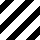
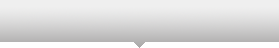
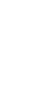
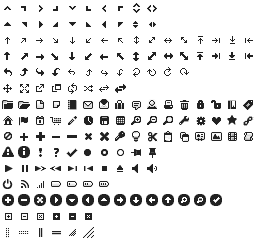
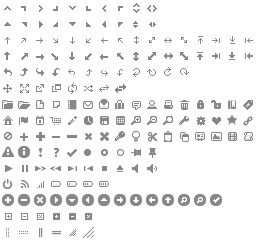
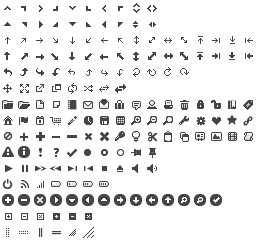
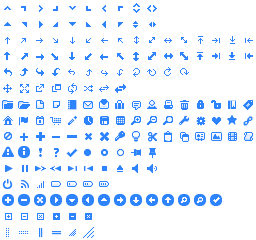
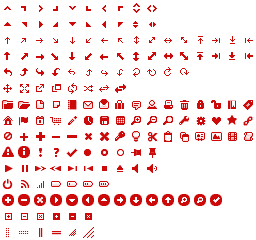
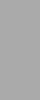
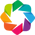
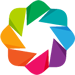
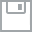
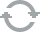
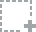
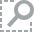
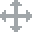
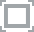
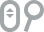

In [9]:
total_time_hist(make_items(5, 5, 10000))
print('')

Now we'll do the same thing, but we'll make the processor twice as fast as the mean arrival interval.


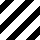
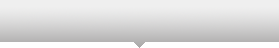
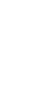
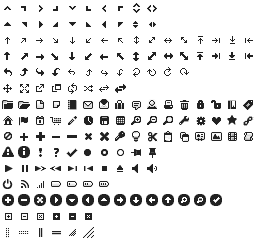
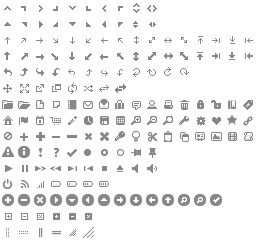
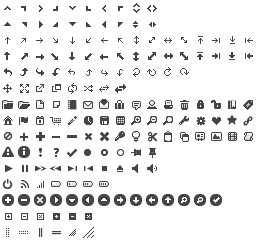
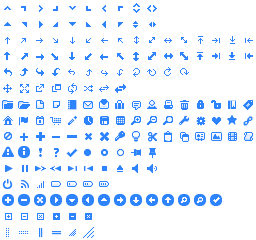
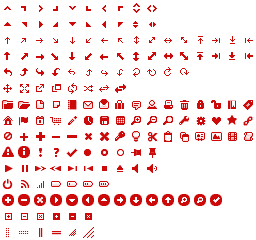
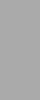
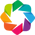
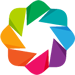
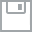
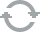
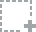
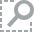
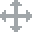
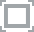
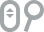

In [10]:
total_time_hist(make_items(10, 5, 10000))

By making the processor very fast - i.e. reducing its percent capacity utilization – items spend much less time in the queue.

What if we make the processor only 10% faster than arrival time?


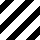
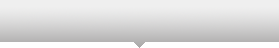
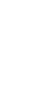
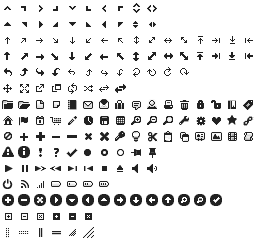
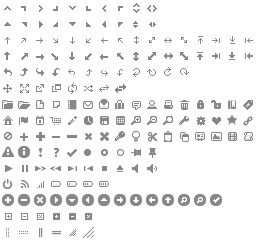
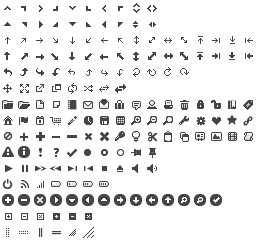
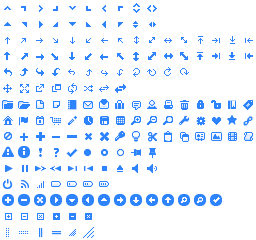
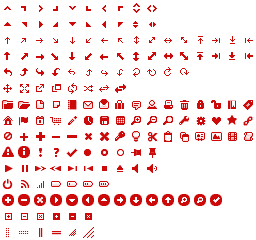
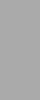
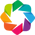
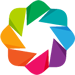
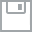
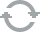
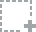
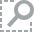
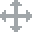
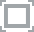
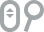

In [11]:
total_time_hist(make_items(10, 9, 10000))


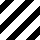
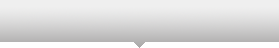
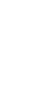
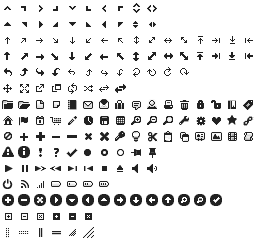
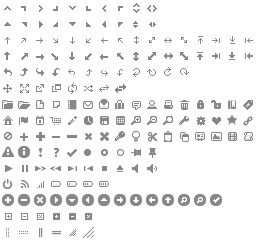
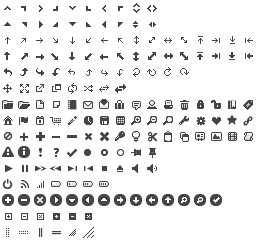
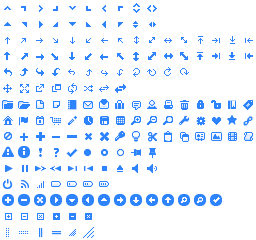
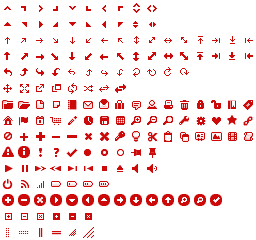
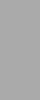
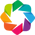
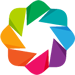
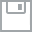
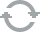
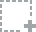
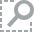
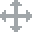
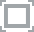
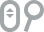

In [13]:
total_time_hist(make_items(30, 10, 10000))